In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore as zs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

In [2]:
Oil_Price = pd.read_csv('BrentOilPrices.csv')

In [3]:
Oil_Price

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [4]:
Oil_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [5]:
Oil_Price.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [6]:
#Checking for duplicate values
Oil_Price.duplicated().sum()

0

In [7]:
#Checking for null values
Oil_Price.isnull().any()

Date     False
Price    False
dtype: bool

In [8]:
#Converting Date column to DateTime format
Oil_Price['Date']= pd.to_datetime(Oil_Price['Date'])

In [9]:
Oil_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB


In [10]:
#Extracting Year from Date column
Oil_Price['Year']= Oil_Price['Date'].dt.year

In [11]:
Oil_Price.head()

,Date,Price,Year
0,1987-05-20,18.63,1987
1,1987-05-21,18.45,1987
2,1987-05-22,18.55,1987
3,1987-05-25,18.60,1987
4,1987-05-26,18.63,1987


In [12]:
#Correlation
Oil_Price.corr()

,Price,Year
Price,1.0000,0.7205
Year,0.7205,1.0000


In [13]:
Oil_Price.shape

(9011, 3)

Visualizations


Text(0.5, 1.0, 'Line Plot')

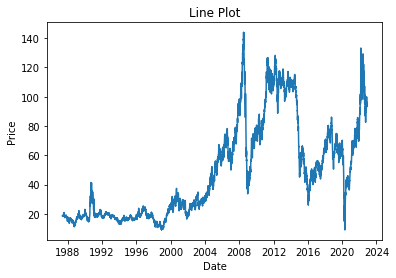

In [14]:
plt.plot(Oil_Price['Date'],Oil_Price['Price'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Line Plot')



Obsevation:-
Has mix of both upward and downward trends

Text(0.5, 1.0, 'Scatter Plot')

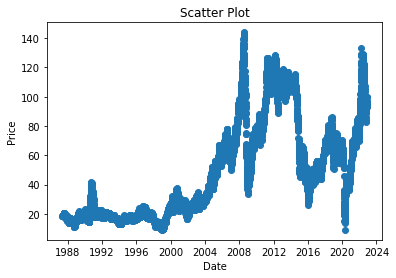

In [15]:
plt.scatter(Oil_Price['Date'],Oil_Price['Price'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Scatter Plot')

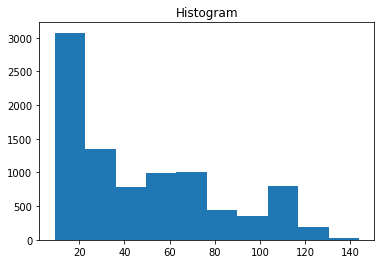

In [16]:
plt.hist(Oil_Price['Price'])

plt.title('Histogram')

plt.show()

Data is right skewed.

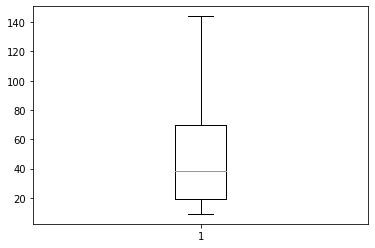

In [17]:
plt.boxplot(Oil_Price['Price'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


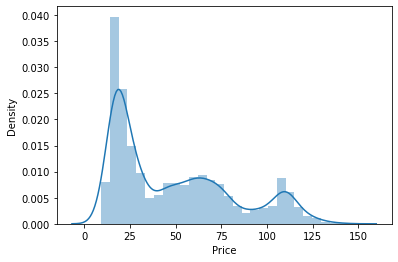

In [18]:
sns.distplot(Oil_Price['Price'])
plt.show()

Observation:
> Most frequent values are in the range of 20 to 30.
 
>Oil prices above 120 are less frequent

>Doesn't follow normal distribution.

Text(0.5, 1.0, 'Year wise box plot')

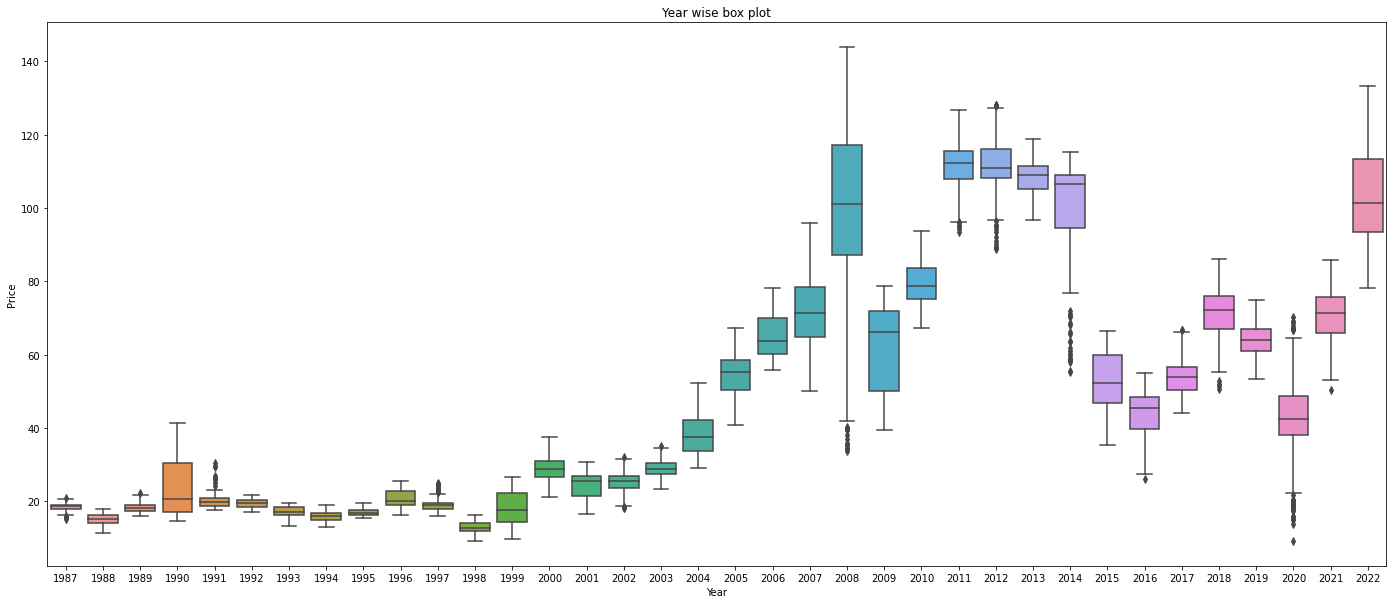

In [19]:
#Year wise box plot
plt.figure(figsize=(24,10))
ax= sns.boxplot(x=Oil_Price['Year'],y=Oil_Price['Price'])
ax.set_title('Year wise box plot')

>During the years 2007,2008 and 2009 wide variations in the values have been observed.

>In the year 2008, which is the year of the financial crisis and huge volatality, the oil price is between 30-140$

>Years 1991,1997,2007,2008,2009,2011,2012,2014,2018 and 2020 show outliers.

In [20]:
Oil_Price1= Oil_Price.copy()

In [21]:
Oil_Price1

,Date,Price,Year
0,1987-05-20,18.63,1987
1,1987-05-21,18.45,1987
2,1987-05-22,18.55,1987
3,1987-05-25,18.60,1987
4,1987-05-26,18.63,1987
...,...,...,...
9006,2022-11-08,96.85,2022
9007,2022-11-09,93.05,2022
9008,2022-11-10,94.25,2022
9009,2022-11-11,96.37,2022


# **Outlier Elimination**

**Method-1**

In [22]:
#dropping records of years showing outliers
excluded_years=[1991,1997,2007,2008,2009,2011,2012,2014,2018,2020]
Oil_Price1 = Oil_Price1[~Oil_Price1['Year'].isin(excluded_years)]

In [23]:
Oil_Price1.set_index('Date',inplace=True)

**Method 2**

In [24]:
#dropping records with zscore>2.5
zscore = np.abs(zs(Oil_Price1['Price']))
Oil_Price1['zscore']=zscore
Oil_Price1.head()

<ipython-input-24-174efc867e24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Oil_Price1['zscore']=zscore


,Price,Year,zscore
Date,,,
1987-05-20,18.63,1987,0.776235
1987-05-21,18.45,1987,0.782807
1987-05-22,18.55,1987,0.779156
1987-05-25,18.60,1987,0.777330
1987-05-26,18.63,1987,0.776235


In [25]:
len(Oil_Price1[Oil_Price1['zscore']>2.5])

219

In [26]:
Oil_Price1= Oil_Price1.loc[Oil_Price1['zscore']<2.5,['Price']]

In [27]:
Oil_Price1.shape

(6273, 1)

In [28]:
Oil_Price1

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2022-11-08,96.85
2022-11-09,93.05
2022-11-10,94.25


# **Data Preparation for Model Building**

**Scaling data for model**

In [29]:
Oil_Price1_train,Oil_Price1_test= train_test_split(Oil_Price1,train_size=0.7,shuffle=False)

In [30]:
sc= MinMaxScaler(feature_range=(0,1))
Oil_Price1_train_ar=sc.fit_transform(Oil_Price1_train)
Oil_Price1_test_ar = sc.fit_transform(Oil_Price1_test)


In [31]:
print(Oil_Price1_train.shape)
print(Oil_Price1_test.shape)

(4391, 1)
(1882, 1)


# **Forecasting Using LSTM**

LSTM is a type of Recurrent Neural Network with 3 gates(input,output & forget).

In [32]:
#Function to create dataset for training and testing
def create_data_set(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return np.array(data_x), np.array(data_y)

In [33]:
#Preparing training and testing data for LSTM
look_back =90
X_train,Y_train,X_test,Ytest = [],[],[],[]
X_train,Y_train=create_data_set(Oil_Price1_train_ar,look_back)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test,Y_test=create_data_set(Oil_Price1_test_ar,look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [34]:
# create and fit the LSTM network regressor = Sequential() 
regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))


regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)
history =regressor.fit(X_train, Y_train, epochs = 20, batch_size = 15,validation_data=(X_test, Y_test), callbacks=[reduce_lr],shuffle=False)
    

Epoch 1/20
287/287 [==============================] - 60s 165ms/step - loss: 0.0034 - val_loss: 0.0486 - lr: 0.0010
Epoch 2/20
287/287 [==============================] - 37s 130ms/step - loss: 0.0050 - val_loss: 0.0556 - lr: 0.0010
Epoch 3/20
287/287 [==============================] - 38s 134ms/step - loss: 0.0058 - val_loss: 0.0788 - lr: 0.0010
Epoch 4/20
287/287 [==============================] - 39s 137ms/step - loss: 0.0048 - val_loss: 0.0807 - lr: 0.0010
Epoch 5/20
287/287 [==============================] - 38s 131ms/step - loss: 0.0025 - val_loss: 0.0205 - lr: 0.0010
Epoch 6/20
287/287 [==============================] - 38s 131ms/step - loss: 0.0011 - val_loss: 0.0157 - lr: 0.0010
Epoch 7/20
287/287 [==============================] - 40s 138ms/step - loss: 9.5129e-04 - val_loss: 0.0084 - lr: 0.0010
Epoch 8/20
287/287 [==============================] - 37s 131ms/step - loss: 8.9090e-04 - val_loss: 0.0069 - lr: 0.0010
Epoch 9/20
287/287 [==============================] - 37s 130ms/

In [35]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

56/56 [==============================] - 2s 40ms/step


In [36]:
# invert predictions
train_predict = sc.inverse_transform(train_predict)
Y_train = sc.inverse_transform([Y_train])
test_predict = sc.inverse_transform(test_predict)
Y_test = sc.inverse_transform([Y_test])

Train Mean Absolute Error: 6.980526030253793
Train Root Mean Squared Error: 7.136958179994681
Test Mean Absolute Error: 5.72709578965111
Test Root Mean Squared Error: 6.2736339449642635


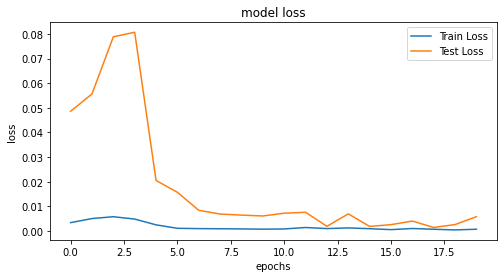

In [37]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

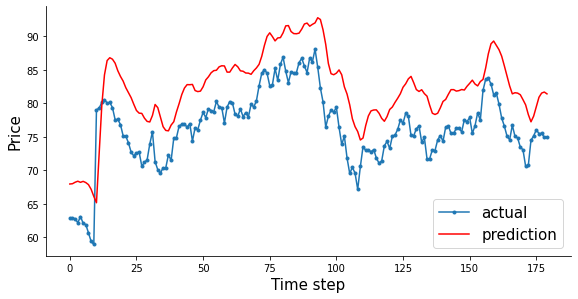

In [38]:
#Compare Actual vs. Prediction
aa=[x for x in range(180)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:180], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:180], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();


In [39]:
past_100_days = Oil_Price1_train.tail(100)

In [40]:
final_df= past_100_days.append(Oil_Price1_test, ignore_index =True)

In [41]:
final_df.head()

,Price
0,59.96
1,61.23
2,61.76
3,62.78
4,62.59


In [42]:
input_data = sc.fit_transform(final_df)
input_data

array([[0.41226472],
       [0.4276867 ],
       [0.43412265],
       ...,
       [0.82865817],
       [0.85440194],
       [0.82064359]])

In [43]:
input_data.shape

(1982, 1)

In [44]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)    
print(x_test.shape)
print(y_test.shape)

(1882, 100, 1)
(1882,)


In [45]:
y_predicted = regressor.predict(x_test)
y_predicted.shape

59/59 [==============================] - 4s 44ms/step


(1882, 1)

In [46]:
y_test

array([0.60327869, 0.59720704, 0.580085  , ..., 0.82865817, 0.85440194,
       0.82064359])

In [47]:
y_predicted

array([[0.7031928 ],
       [0.6946796 ],
       [0.68270975],
       ...,
       [0.91407144],
       [0.8995695 ],
       [0.9006752 ]], dtype=float32)

In [48]:
scaler=sc.scale_

In [49]:
scaler

array([0.01214329])

In [50]:
scale_factor = 1/scaler[0]

y_predicted = y_predicted * scale_factor

y_test = y_test* scale_factor

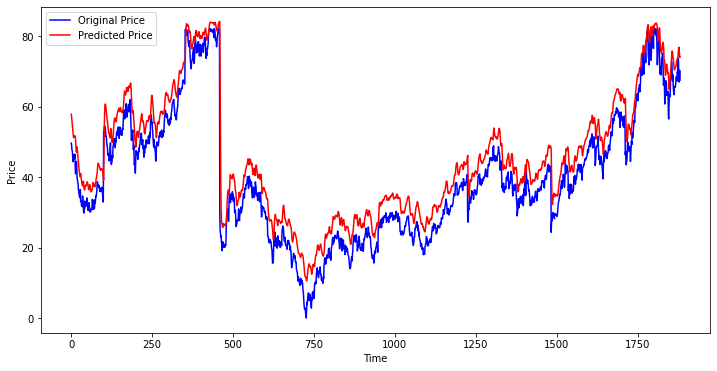

In [51]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [52]:
rmse=np.sqrt(np.mean(((y_predicted- y_test)**2)))
print(rmse)

26.00834731572107


In [53]:
y_predicted

array([[57.907925],
       [57.206867],
       [56.221146],
       ...,
       [75.27378 ],
       [74.07955 ],
       [74.1706  ]], dtype=float32)

In [54]:
Oil_Price1.reset_index(inplace=True)

In [55]:
Oil_Price1

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
6268,2022-11-08,96.85
6269,2022-11-09,93.05
6270,2022-11-10,94.25
6271,2022-11-11,96.37


In [56]:
import datetime as dt

In [57]:
# Predict future price 
df1=Oil_Price1.reset_index()['Price']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
datemax="14/11/2022"
datemax =dt.datetime.strptime(datemax,"%d/%m/%Y")
x_input=df1[:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

time_str = input("enter time in this format yyyy-mm-dd")
#time=datetime.datetime.strptime(time_str, "%Y-%m-%d")
#date1=str(date1)
date1=dt.datetime.strptime(time_str,"%Y-%m-%d")

nDay=date1-datemax
nDay=nDay.days
lst_output=[]
n_steps=6273
i=0

while(i<=nDay):
    
    if(len(temp_input)>n_steps):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
res =scaler.inverse_transform(lst_output)
output = res[nDay-1]

enter time in this format yyyy-mm-dd2023-01-10
[0.9212651]
6274
1 day input [0.09419706 0.09520451 0.09570824 ... 0.87920613 0.85119887 0.92126513]
1 day output [[0.9375419]]
2 day input [0.09520451 0.09570824 0.09601048 ... 0.85119887 0.92126513 0.9375419 ]
2 day output [[0.9583308]]
3 day input [0.09570824 0.09601048 0.09570824 ... 0.92126513 0.9375419  0.95833081]
3 day output [[0.97795504]]
4 day input [0.09601048 0.09570824 0.09570824 ... 0.9375419  0.95833081 0.97795504]
4 day output [[0.99424917]]
5 day input [0.09570824 0.09570824 0.09550675 ... 0.95833081 0.97795504 0.99424917]
5 day output [[1.0073385]]
6 day input [0.09570824 0.09550675 0.09621197 ... 0.97795504 0.99424917 1.00733852]
6 day output [[1.0176618]]
7 day input [0.09550675 0.09621197 0.09651421 ... 0.99424917 1.00733852 1.01766181]
7 day output [[1.0257648]]
8 day input [0.09621197 0.09651421 0.09721942 ... 1.00733852 1.01766181 1.02576482]
8 day output [[1.0321445]]
9 day input [0.09651421 0.09721942 0.09752166 

In [58]:
date1

datetime.datetime(2023, 1, 10, 0, 0)

In [59]:
datemax

datetime.datetime(2022, 11, 14, 0, 0)

In [60]:
output

array([114.7363893])